<a href="https://colab.research.google.com/github/dincerkurnaz/machine-learning/blob/master/keras2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import keras

from sklearn.preprocessing import Imputer

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.optimizers import SGD


Using TensorFlow backend.


https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf


In [2]:
veri = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")
veri.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
veri.replace('?',-99999,inplace=True) # soru işareti olan alanların hepsini -9999 olarak desgistiriyoruz.
veriyeni = veri.drop(['1000025'],axis=1)# id olan ilk sutunun tamamını siliyoruz.

imp = Imputer(missing_values=-99999, strategy="mean",axis=0)# -9999 olanları bulup diger alanları toplayıp satırın ortalamasını alıyor. 

veriyeni = imp.fit_transform(veriyeni) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
giris = veriyeni[:,0:8] #ozellikler
cikis = veriyeni[:,9] # class

In [5]:
model = Sequential() #

model.add(Dense(128,input_dim=8))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # noronların yarısını rastgele drop edecek
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # noronların yarısını rastgele drop edecek
model.add(Dense(128))
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)


model.fit(giris,cikis,epochs=10,batch_size=32,validation_split=0.20,callbacks=[early_stopping_monitor])


W0620 13:09:24.026909 140337067489152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 13:09:24.078102 140337067489152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 13:09:24.085834 140337067489152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 13:09:24.109702 140337067489152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0620 13:09:24.240205 

Train on 558 samples, validate on 140 samples
Epoch 1/10
558/558 [==============================] - 1s 2ms/step - loss: 3.8973 - acc: 0.2043 - val_loss: 2.9706 - val_acc: 0.2500
Epoch 2/10
558/558 [==============================] - 0s 74us/step - loss: 2.0993 - acc: 0.4731 - val_loss: 1.3426 - val_acc: 0.6286
Epoch 3/10
558/558 [==============================] - 0s 63us/step - loss: 1.1227 - acc: 0.6470 - val_loss: 0.5016 - val_acc: 0.9071
Epoch 4/10
558/558 [==============================] - 0s 63us/step - loss: 0.7747 - acc: 0.7025 - val_loss: 0.3784 - val_acc: 0.9214
Epoch 5/10
558/558 [==============================] - 0s 66us/step - loss: 0.6628 - acc: 0.7366 - val_loss: 0.3288 - val_acc: 0.9286
Epoch 6/10
558/558 [==============================] - 0s 64us/step - loss: 0.6532 - acc: 0.7599 - val_loss: 0.3281 - val_acc: 0.9500
Epoch 7/10
558/558 [==============================] - 0s 68us/step - loss: 0.5661 - acc: 0.8029 - val_loss: 0.2854 - val_acc: 0.9500
Epoch 8/10
558/558 [====

In [6]:
tahmin1 = np.array([5,10,10,5,4,5,4,4]).reshape(1,8) #soru soralim

tahmin2 = np.array([5,10,3,1,8,1,9,1]).reshape(1,8) #soru soralim

print(model.predict_classes(tahmin1)) # tahin alalım
print(model.predict_classes(tahmin2))



[4]
[2]


In [0]:
from keras.utils.vis_utils import plot_model, model_to_dot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


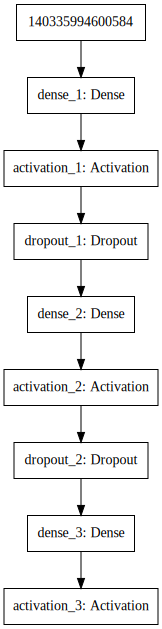

In [8]:
from IPython.display import SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [9]:
print(model.summary())
model.get_config() 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
__________

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'batch_input_shape': (None, 8),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_1',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Activation',
   'config': {'activation': 'relu',
    'name': 'activation_1',
    'trainable': True}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_1',
    'noise_shape': None,
    'rate': 0.5,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'bias_constraint': 

In [0]:
from keras.models import load_model 
model.save('model_file.h5') #modeli kaydedelim
my_model = load_model('model_file.h5') #modeli yukleyelim.

In [11]:
tahmin3 = np.array([5,10,3,1,8,1,9,1]).reshape(1,8) #soru soralim

print(my_model.predict_classes(tahmin3)) # tahin alalım

[2]


In [12]:
!pip3 install ann_visualizer

from ann_visualizer.visualize import ann_viz;
ann_viz(model, title="My graph")


  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer
